In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#Load Dataset
file_path = '/content/TBO_4k_train.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet 1')

In [3]:
#Data Preprocessing
# Focus on 'text' and 'T1 Harmful' columns and drop missing values
df_subset = df[['text', 'T1 Harmful']].dropna()

# Convert labels to binary (YES = 1, NO = 0)
df_subset['T1 Harmful'] = df_subset['T1 Harmful'].apply(lambda x: 1 if x == 'YES' else 0)

<ipython-input-4-927ff60e394f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='T1 Harmful', data=df_subset, palette='viridis')


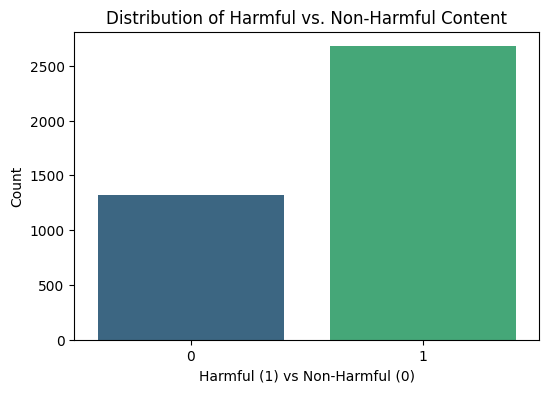

In [4]:
#Data Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='T1 Harmful', data=df_subset, palette='viridis')
plt.title('Distribution of Harmful vs. Non-Harmful Content')
plt.xlabel('Harmful (1) vs Non-Harmful (0)')
plt.ylabel('Count')
plt.show()

In [5]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(df_subset['text'], df_subset['T1 Harmful'], test_size=0.3, random_state=42)

In [6]:
#Feature Engineering (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
#Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [8]:
#Model Evaluation
y_pred = model.predict(X_test_tfidf)

# Print Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.31      0.40       381
           1       0.74      0.90      0.81       819

    accuracy                           0.71      1200
   macro avg       0.66      0.60      0.61      1200
weighted avg       0.69      0.71      0.68      1200

Accuracy: 0.71


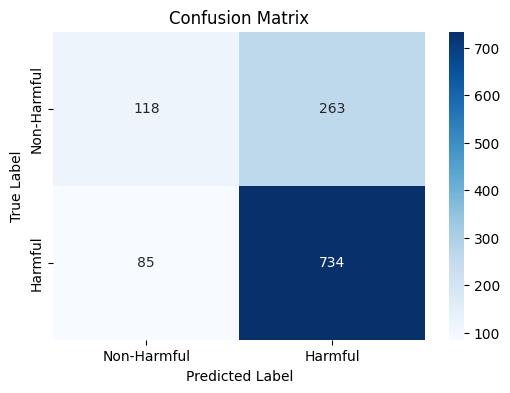

In [9]:
#Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Harmful', 'Harmful'], yticklabels=['Non-Harmful', 'Harmful'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<ipython-input-10-29bd3c889dbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


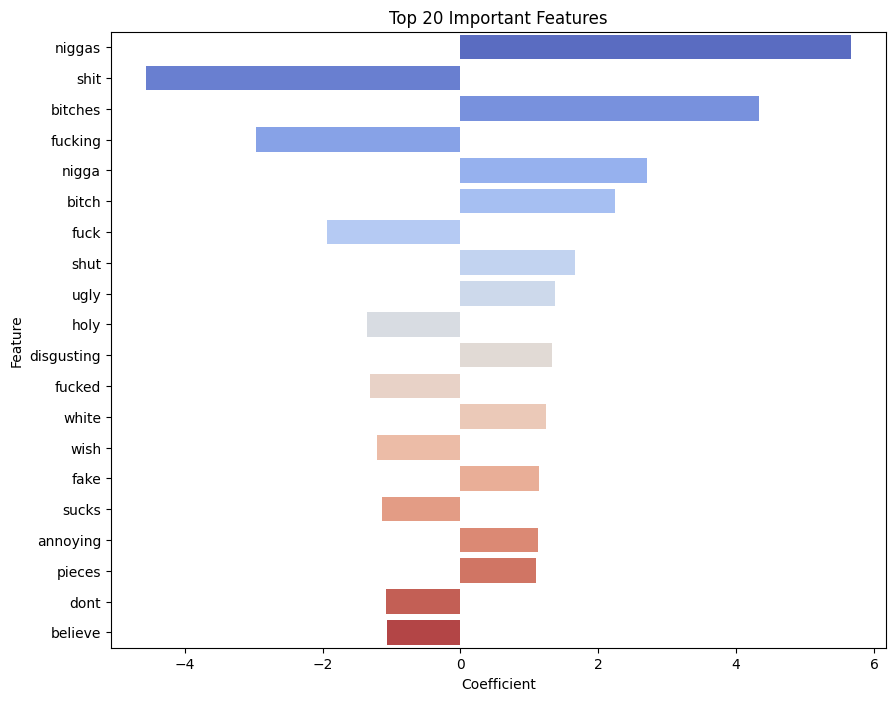

In [10]:
#Visualize Feature Importance
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_.flatten()
feature_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Top Positive and Negative Features
top_features = feature_df.reindex(feature_df.Coefficient.abs().sort_values(ascending=False).index).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top 20 Important Features')
plt.show()

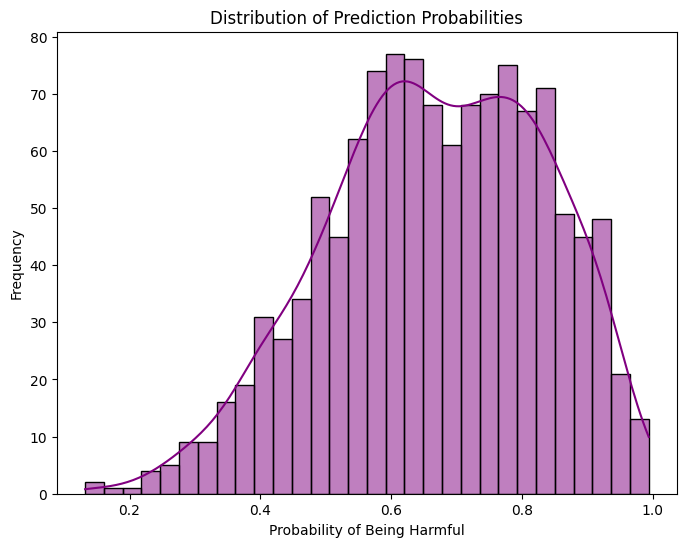

In [11]:
#Distribution of Prediction Probabilities
y_probs = model.predict_proba(X_test_tfidf)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(y_probs, bins=30, kde=True, color='purple')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Probability of Being Harmful')
plt.ylabel('Frequency')
plt.show()